**Introduction and Workspace setting**

We collected a valueble dataset just before the election from random street interviews in kaduwela Colombo area in Sri Lanka in order to predict the winnning presidential election candidate of Sri Lanka in 2019 polls and collected people's rationale behind their decision and try to come up with policies that the people think the winner should bring forward. In order to collect above date, we have prepared a questionnaire with 12 questions and offered them to randomly selected persons at public places. The participation to the survey was completely on their preference and there was no persuation to get the data from individuals. Other than to road interviews, we have done the same survey on social media with the same questions and collected those responses separately.

> Dataset contains,
> 1. Road interviews data (face_to_face_road_interviews.csv)
> 2. Social media data (social_media_votes.csv)

Please go to our [github repo](https://github.com/PraAnj/srilanka-election-prediction-2019) for more information. This repo contains the questionnaire and the dataset along with analysis scripts. This dataset is publicly available so that anyone can use it for academic work.

In [307]:
library(tidyverse) # metapackage with lots of helpful functions
list.files(path = "../input/srilankanpresidentialelectionprediction2019")

[1] "face_to_face_road_interviews.csv" "social_media_votes.csv"

### Loading data

In [308]:
roadInterviewData <- read.csv(file="../input/srilankanpresidentialelectionprediction2019/face_to_face_road_interviews.csv", header=TRUE, sep=",")
head(roadInterviewData)
summary(roadInterviewData$firstVote)

,timestamp,firstVote,secondVote,policyInclination,isExecutivePresidencyRequired,voteOf2015,age,gender,religion,income,ethnicity,district,education
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2019/10/29 2:07:11 PM GMT+5:30,Gotabaya Rajapaksa,Gotabaya Rajapaksa,Corruption free/ less country,I do not care,Mahinda Rajapasa,55 to 64,Female,Buddhist,"Below 15,000",Sinhala,Kegalla,Primary
2,2019/10/29 2:11:07 PM GMT+5:30,Gotabaya Rajapaksa,Not voting,Economic stability,"Yes, we need an executive president",Mahinda Rajapasa,45 to 54,Female,Buddhist,"15,001 to 30,000",Sinhala,,Ordinary level (O/L)
3,2019/10/29 2:13:14 PM GMT+5:30,Gotabaya Rajapaksa,Not voting,Economic stability,"Yes, we need an executive president",I did not vote,35 to 44,Female,Buddhist,"30,001 to 50,000",Sinhala,"homagama, colombo",Graduated
4,2019/10/29 2:15:40 PM GMT+5:30,Sajith Premadasa,Gotabaya Rajapaksa,Economic stability,"Yes, we need an executive president",Maithreepala Sirisena,35 to 44,Male,Buddhist,"30,001 to 50,000",Sinhala,"kaduwela, colombo",Advanced level (A/L)
5,2019/10/29 2:17:10 PM GMT+5:30,Anura Kumara Dissanayake,Not voting,Economic stability,"No, executive presidency should be removed.",Other,55 to 64,Male,Buddhist,"30,001 to 50,000",Sinhala,Kaduwela,Ordinary level (O/L)
6,2019/10/29 2:21:31 PM GMT+5:30,Gotabaya Rajapaksa,Not voting,National security,"Yes, we need an executive president",Mahinda Rajapasa,35 to 44,Female,Buddhist,"Below 15,000",Sinhala,"kaduwela, colombo",Ordinary level (O/L)


Anura Kumara Dissanayake       Gotabaya Rajapaksa        Mahesh Senanayake 
                       8                       26                        2 
              Not voting                    Other         Sajith Premadasa 
                       6                        1                        4

In [309]:
tabEducationVsCandidate <- table(roadInterviewData$education, roadInterviewData$firstVote)
ftable(tabEducationVsCandidate)

                      Anura Kumara Dissanayake Gotabaya Rajapaksa Mahesh Senanayake Not voting Other Sajith Premadasa
                                                                                                                     
Advanced level (A/L)                         3                  6                 2          3     0                1
Graduated                                    3                  5                 0          2     0                0
Ordinary level (O/L)                         2                 12                 0          1     1                2
Primary                                      0                  3                 0          0     0                1

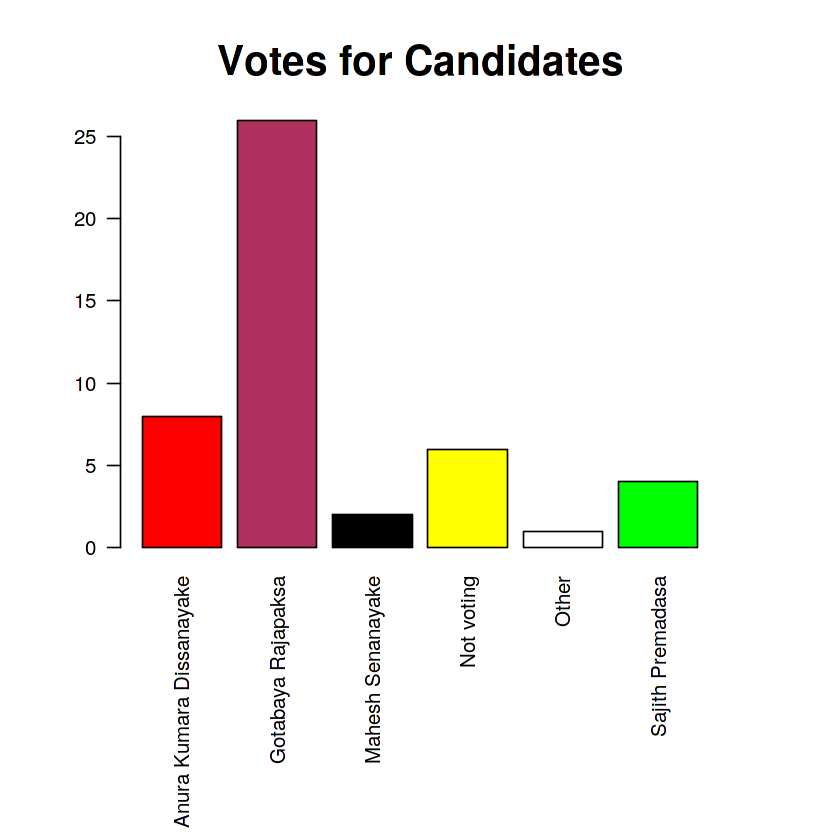

In [310]:
par(las=2, mar=c(12,5,5,5))
counts <- table(roadInterviewData$firstVote)
barplot(counts, main="Votes for Candidates", col=
        c("red","maroon", "black", "yellow", "white", "green"), cex.main=2)


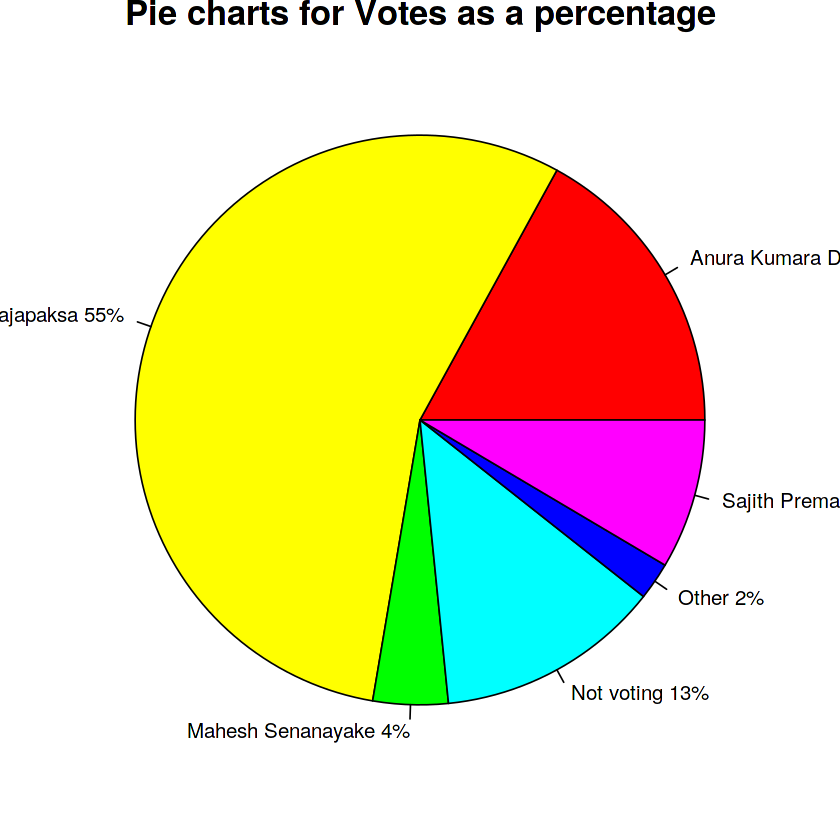

In [311]:
par(las=2, mar=c(1,1,1,1))
slices <- c(counts)
lbls <- c(colnames(tabEducationVsCandidate))

pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

pie(slices, labels = lbls, col=rainbow(length(slices)), main="Pie charts for Votes as a percentage", radius=1.5, cex.main=1.7, cex=1)

### Education Level of people vs selected Candidate

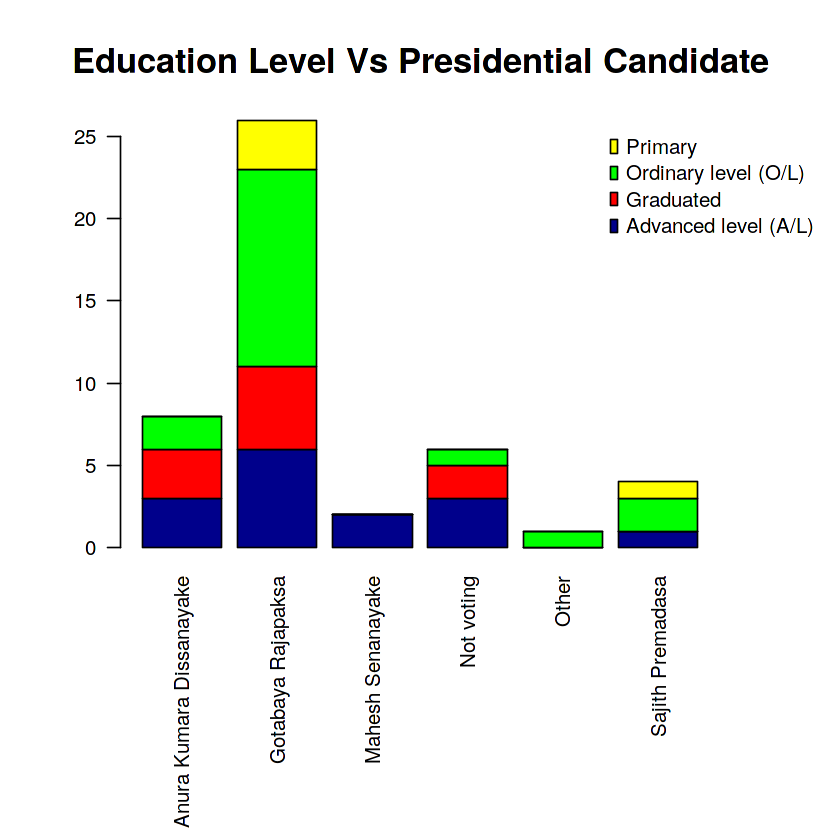

In [312]:
par(las=2, mar=c(12,5,5,5))

barplot(tabEducationVsCandidate, main="Education Level Vs Presidential Candidate", col=c("darkblue","red", "green", "yellow"),
        legend = rownames(tabEducationVsCandidate), cex.lab=1, cex.main=1.7, args.legend = list(x = 'topright', bty='n'))
png(file = "test.jpg")

### Policies vs Candidates

In [313]:
tabPolicyVsCandidate <- table(roadInterviewData$policyInclination, roadInterviewData$firstVote)
ftable(tabPolicyVsCandidate)

                                 Anura Kumara Dissanayake Gotabaya Rajapaksa Mahesh Senanayake Not voting Other Sajith Premadasa
                                                                                                                                
Corruption free/ less country                           3                  3                 0          2     0                1
Economic stability                                      3                 13                 1          3     0                3
Education development                                   1                  0                 0          0     0                0
National security                                       0                  8                 1          0     1                0
Other                                                   1                  0                 0          1     0                0
Solve ethnic/religious problems                         0                  2                 0   

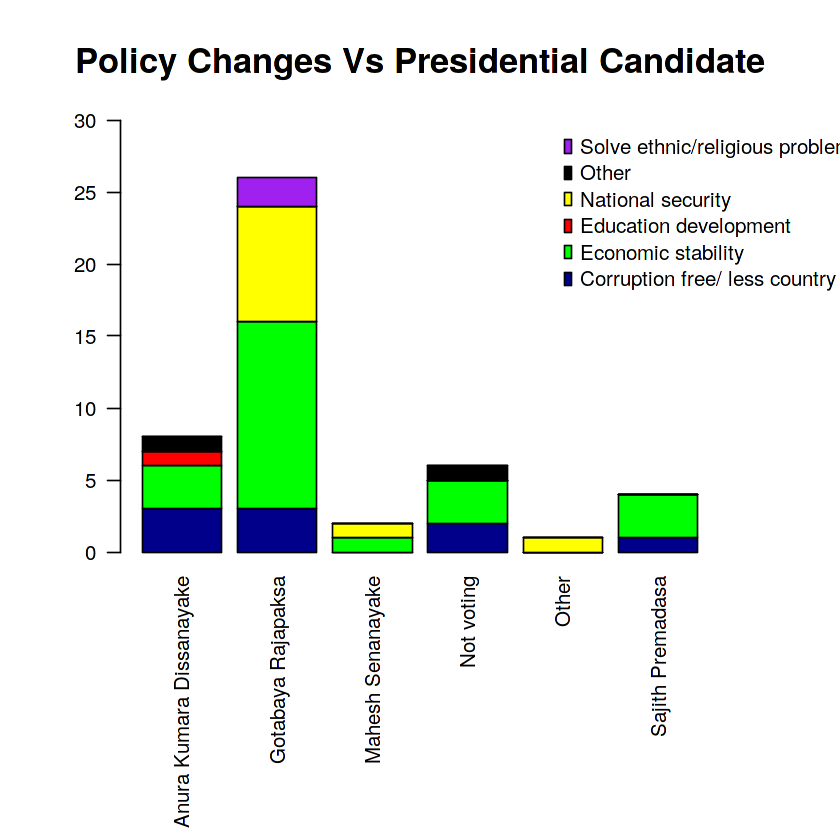

In [314]:
par(las=2,mar=c(12,5,5,5))

barplot(tabPolicyVsCandidate, main="Policy Changes Vs Presidential Candidate", 
        col=c("darkblue","green", "red", "yellow", "black", "purple", "white", "blue"), cex.lab=2, cex.main=1.7, 
        legend = rownames(tabPolicyVsCandidate), args.legend = list(x='topright', bty='n'), ylim=c(0,30) )

### Income vs candidate

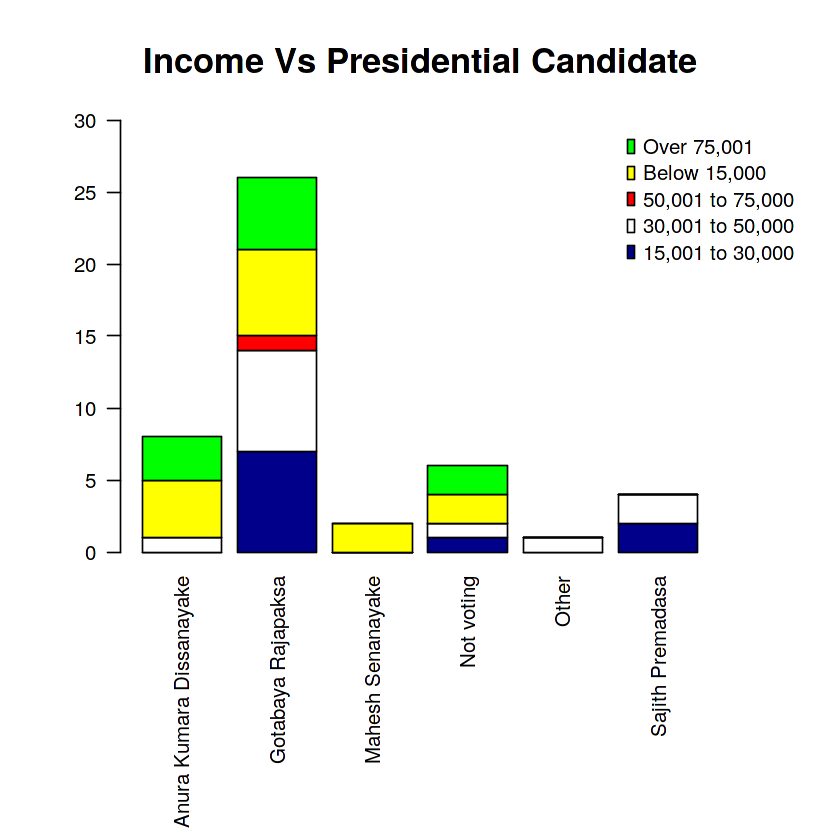

In [315]:
tabIncomeVsCandidate <- table(roadInterviewData$income, roadInterviewData$firstVote)

par(las=2,mar=c(12,5,5,5))
barplot(tabIncomeVsCandidate, main="Income Vs Presidential Candidate", 
        col=c("darkblue","white", "red", "yellow", "green"), cex.lab=2, cex.main=1.7, 
        legend = rownames(tabIncomeVsCandidate), args.legend = list(x='topright', bty='n'), ylim=c(0,30) )

### Age vs Candidate

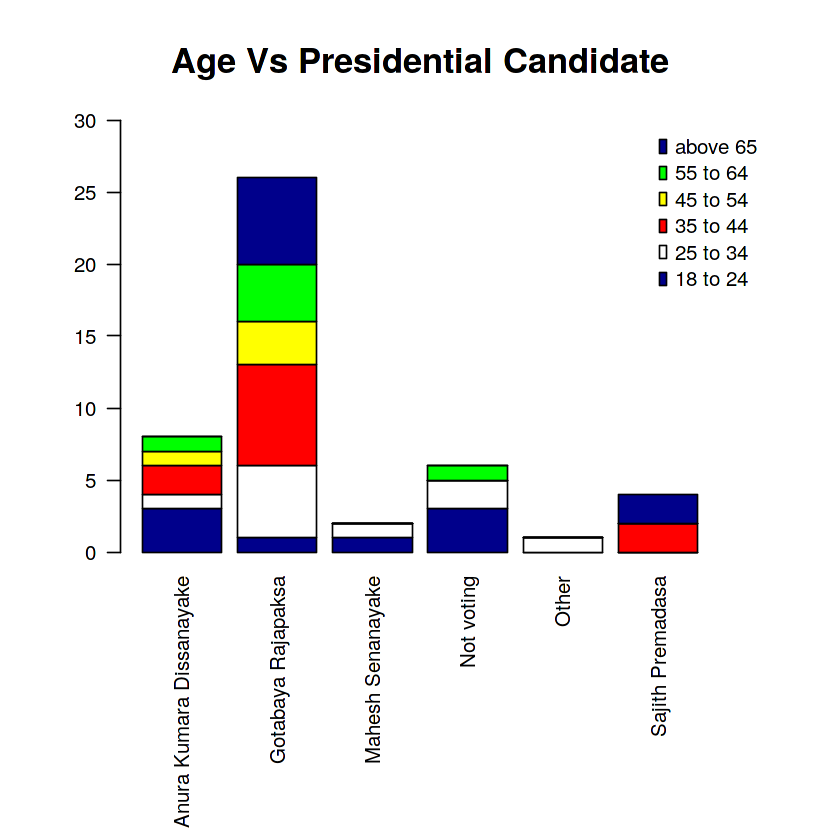

In [316]:
tabAgeVsCandidate <- table(roadInterviewData$age, roadInterviewData$firstVote)

par(las=2,mar=c(12,5,5,5))
barplot(tabAgeVsCandidate, main="Age Vs Presidential Candidate", 
        col=c("darkblue","white", "red", "yellow", "green"), cex.lab=2, cex.main=1.7, 
        legend = rownames(tabAgeVsCandidate), args.legend = list(x='topright', bty='n'), ylim=c(0,30) )

### Gender vs Candidate

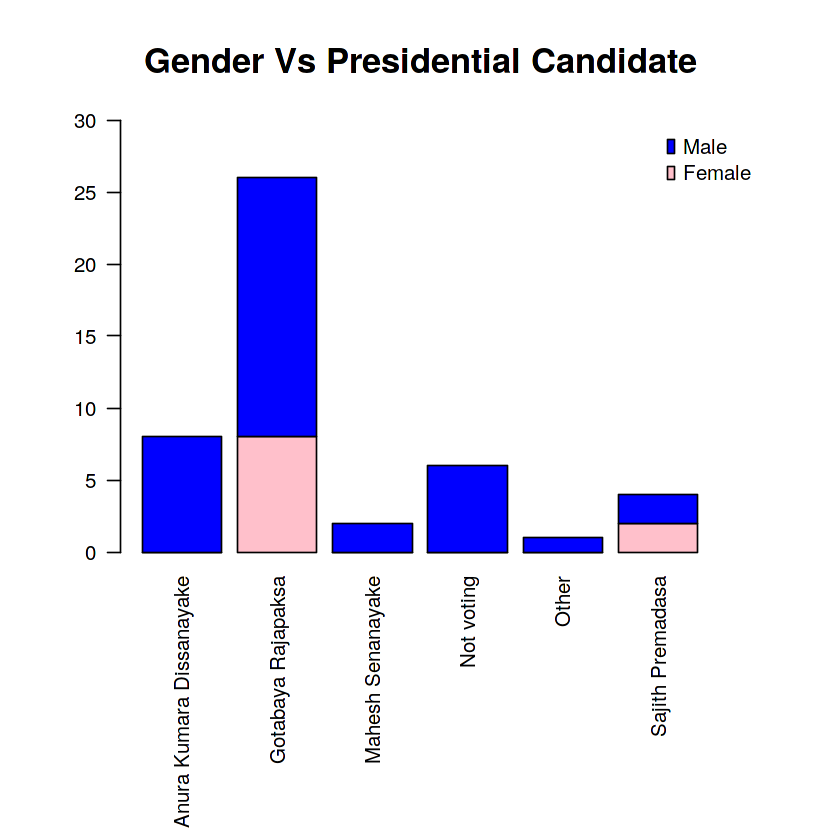

In [317]:
tabGenderVsCandidate <- table(roadInterviewData$gender, roadInterviewData$firstVote)

par(las=2,mar=c(12,5,5,5))
barplot(tabGenderVsCandidate, main="Gender Vs Presidential Candidate", 
        col=c("pink","blue"), cex.lab=2, cex.main=1.7, 
        legend = rownames(tabGenderVsCandidate), args.legend = list(x='topright', bty='n'), ylim=c(0,30) )

### Religion vs candidate

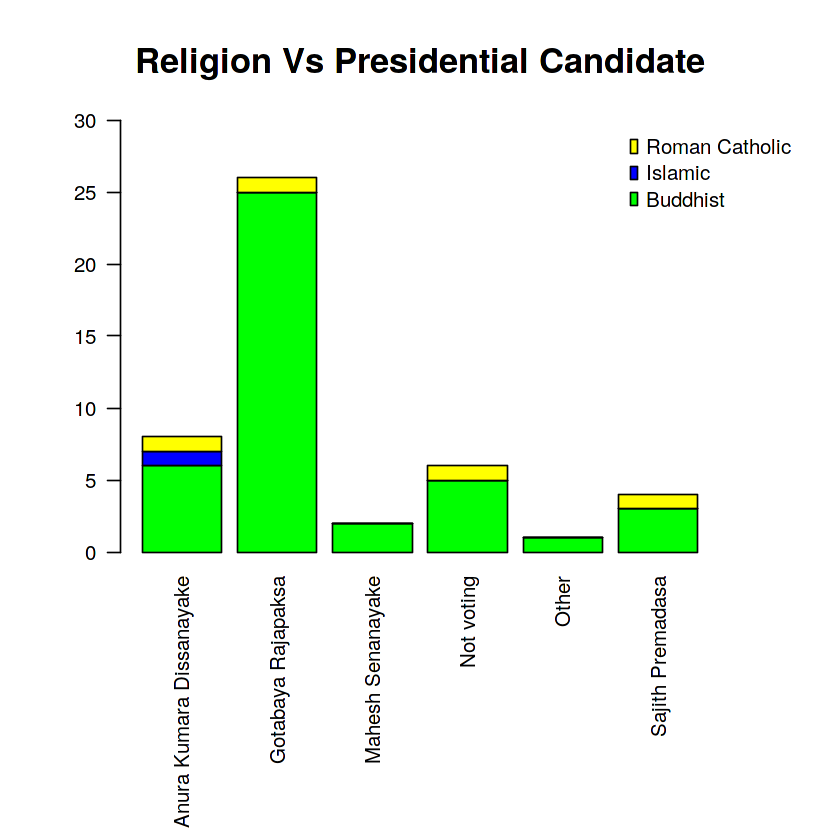

In [318]:
tabReligionVsCandidate <- table(roadInterviewData$religion, roadInterviewData$firstVote)

par(las=2,mar=c(12,5,5,5))
barplot(tabReligionVsCandidate, main="Religion Vs Presidential Candidate", 
        col=c("green","blue", "yellow"), cex.lab=2, cex.main=1.7, 
        legend = rownames(tabReligionVsCandidate), args.legend = list(x='topright', bty='n'), ylim=c(0,30) )

### Ethnicity vs candidate

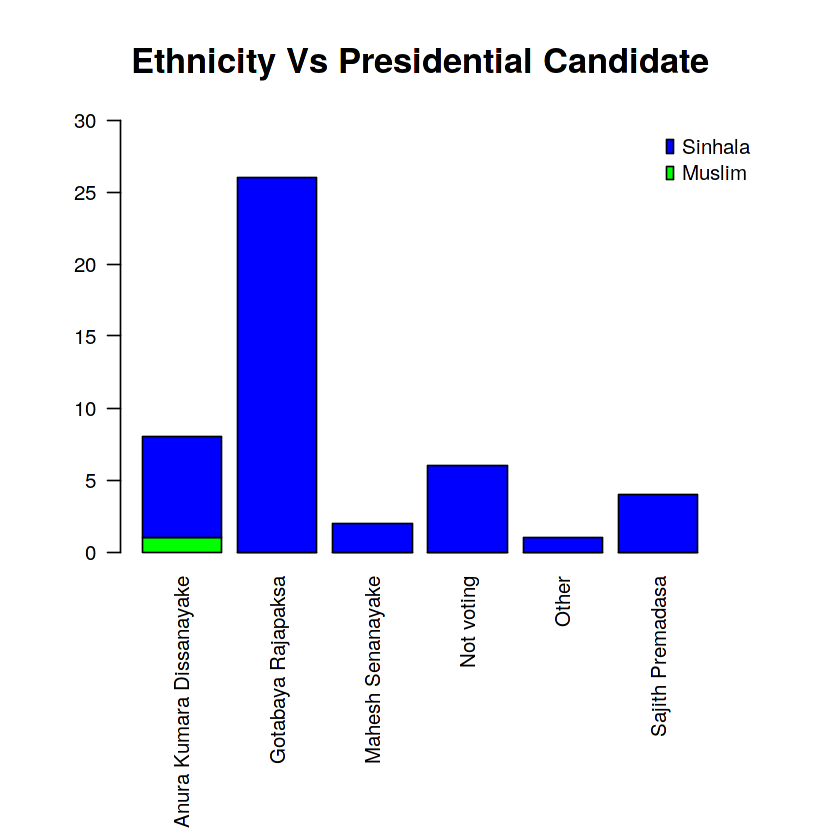

In [319]:
tabEthnicityVsCandidate <- table(roadInterviewData$ethnicity, roadInterviewData$firstVote)

par(las=2,mar=c(12,5,5,5))
barplot(tabEthnicityVsCandidate, main="Ethnicity Vs Presidential Candidate", 
        col=c("green","blue", "yellow"), cex.lab=2, cex.main=1.7, 
        legend = rownames(tabEthnicityVsCandidate), args.legend = list(x='topright', bty='n'), ylim=c(0,30) )

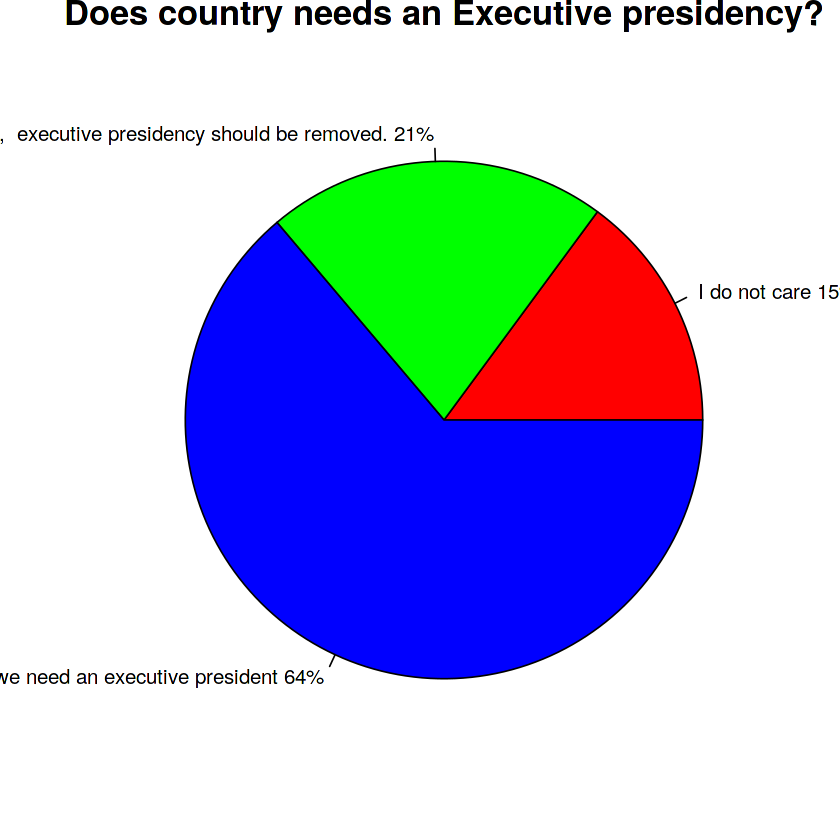

In [320]:
# percentage <- round(counts/sum(counts)*100)
tableExecPresidency <- table(roadInterviewData$isExecutivePresidencyRequired, roadInterviewData$isExecutivePresidencyRequired)
counts <- table(roadInterviewData$isExecutivePresidencyRequired)

par(las=2, mar=c(1,5,1,3))
slices <- c(counts)
lbls <- c(colnames(tableExecPresidency))

pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

pie(slices, labels = lbls, col=rainbow(length(slices)), main="Does country needs an Executive presidency?", radius=1.5, cex.main=1.7, cex=1)

## Bootstrapping testing on winning candidate

#### Removing votes marked as "Not voting" and "Not Decided yet"

In [321]:
socialdataCleaned <- subset(roadInterviewData, (firstVote != 'Not voting' ))
socialdataCleaned <- subset(socialdataCleaned, (firstVote != 'Not Decided yet' ))

In [322]:
foo <- function(data, indices){
    dt <- data[indices,]    
    tbl <- table(dt$firstVote)
    t = as.data.frame(tbl)
    t[,2] <- t[,2]/sum(t[,2])*100
    c(mean(t[2,2]))
}

### Running bootstraping on data set with 1000 repititions

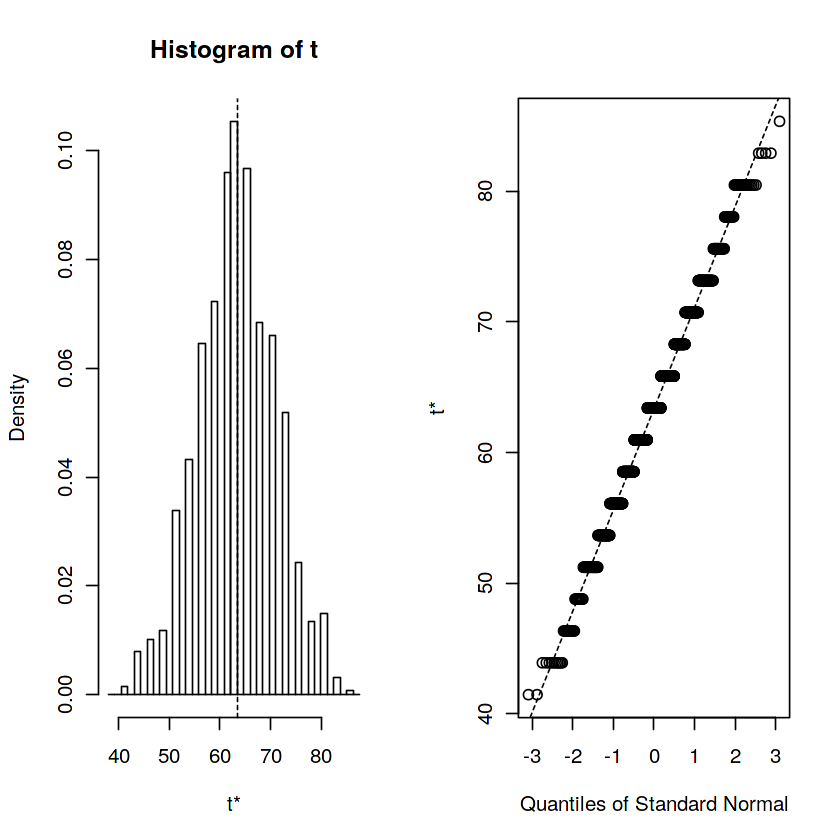

In [323]:
library(boot)

set.seed(12345)
myBootstrap <- boot(socialdataCleaned, foo, R=1000)
plot(myBootstrap, index=1)

###  Calculate 95% confident interval for the percentage Gotabaya Rajapaksha will get

In [324]:
boot.ci(myBootstrap, index=1, type='norm')

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = myBootstrap, type = "norm", index = 1)

Intervals : 
Level      Normal        
95%   (48.27, 78.67 )  
Calculations and Intervals on Original Scale

**Threfore we can be 95% confident that Gotabaya Rajapaksha will get 48.27%  to 78.67% in this presidential election and become the president !!**

### Combining Social media data

In [325]:
socialdata <- read.csv(file="../input/srilankanpresidentialelectionprediction2019/social_media_votes.csv", header=TRUE, sep=",")
head(socialdata)

,timestamp,firstVote,secondVote,policyInclination,isExecutivePresidencyRequired,voteOf2015,age,gender,religion,income,ethnicity,district,education
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2019/10/30 7:27:33 AM GMT+5:30,Gotabaya Rajapaksa,Mahesh Senannayake,Economic stability,"Yes, we need an executive president",Maithreepala Sirisena,25 to 34,Male,Buddhist,"Over 75,001",Sinhala,Kandy,Graduated
2,2019/10/30 7:30:28 AM GMT+5:30,Gotabaya Rajapaksa,Mahesh Senannayake,National security,"Yes, we need an executive president",Maithreepala Sirisena,25 to 34,Male,Buddhist,"Over 75,001",Sinhala,Kurunegala,Graduated
3,2019/10/30 7:36:19 AM GMT+5:30,Anura Kumara Dissanayake,Gotabaya Rajapaksa,Corruption free/ less country,I do not care,Maithreepala Sirisena,25 to 34,Male,Buddhist,"Over 75,001",Sinhala,Galle,Graduated
4,2019/10/30 7:41:12 AM GMT+5:30,Sajith Premadasa,Mahesh Senannayake,Promote agriculture,"Yes, we need an executive president",I did not vote,35 to 44,Male,Buddhist,"Over 75,001",Sinhala,Colombo,Graduated
5,2019/10/30 7:49:34 AM GMT+5:30,Gotabaya Rajapaksa,Not voting,Economic stability,"Yes, we need an executive president",Mahinda Rajapasa,25 to 34,Male,Buddhist,"Over 75,001",Sinhala,Galle,Graduated
6,2019/10/30 7:51:48 AM GMT+5:30,Gotabaya Rajapaksa,Mahesh Senannayake,infrastructure development,"Yes, we need an executive president",Mahinda Rajapasa,25 to 34,Male,Buddhist,"Over 75,001",Sinhala,Matara,Graduated


### Combining road interviewed data frames and social media data

In [333]:
combined = rbind(roadInterviewData, socialdata)

combined <- subset(combined, firstVote != 'Not voting')
combined <- subset(combined, (firstVote != 'Not Decided yet' ))

                      Anura Kumara Dissanayake Gotabaya Rajapaksa Mahesh Senanayake Not voting Other Sajith Premadasa Not Decided yet
                                                                                                                                     
Advanced level (A/L)                         3                  6                 2          0     0                1               0
Graduated                                   11                 29                 5          0     0                2               0
Ordinary level (O/L)                         2                 13                 0          0     1                2               0
Primary                                      0                  3                 0          0     0                1               0
Deploma                                      0                  1                 0          0     0                0               0

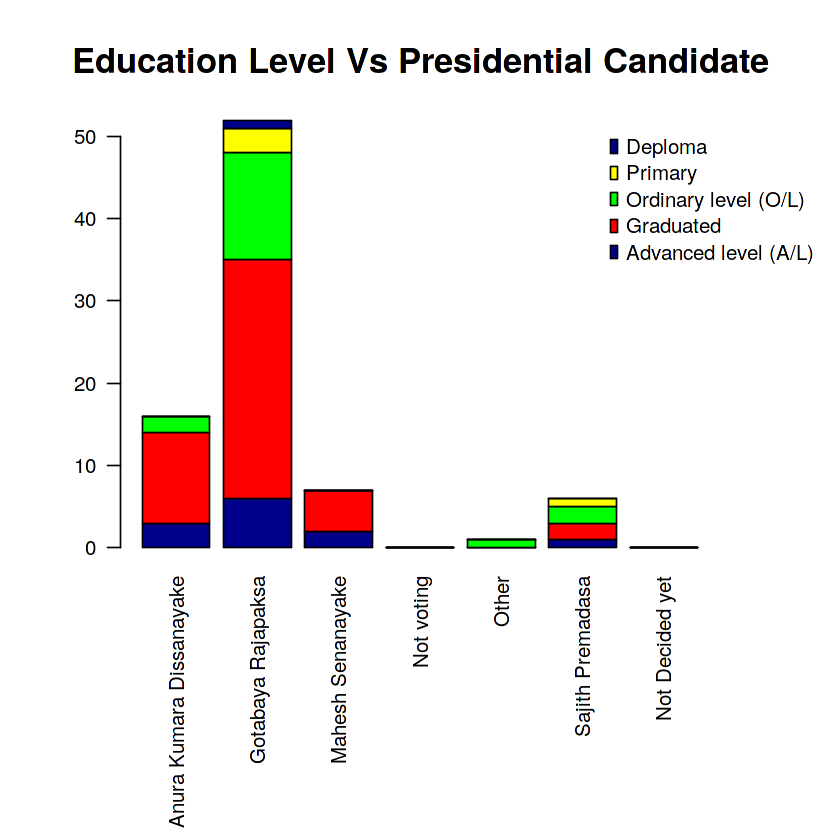

In [334]:
tabEducationVsCandidate <- table(combined$education, combined$firstVote)
ftable(tabEducationVsCandidate)

par(las=2, mar=c(12,5,5,5))

barplot(tabEducationVsCandidate, main="Education Level Vs Presidential Candidate", col=c("darkblue","red", "green", "yellow"),
        legend = rownames(tabEducationVsCandidate), cex.lab=1, cex.main=1.7, args.legend = list(x = 'topright', bty='n'))

**It can vishually be seen that most of the graduated people are voting Gotabaya Rajapaksha**

Lets do a Bootstrap experiment on how many graduated people will vote for Gotabaya Rajapaksha

### Running a bootstrapping on graguated people percentage voting for GR

In [395]:
graduatedPercentage <- function(data, indices){
    dt <- data[indices,]
    tbl <- table(dt$education, dt$firstVote)
    tbl[2,] = tbl[2,]/sum(tbl[2,]) * 100
    c(mean(tbl[2,2]))
}

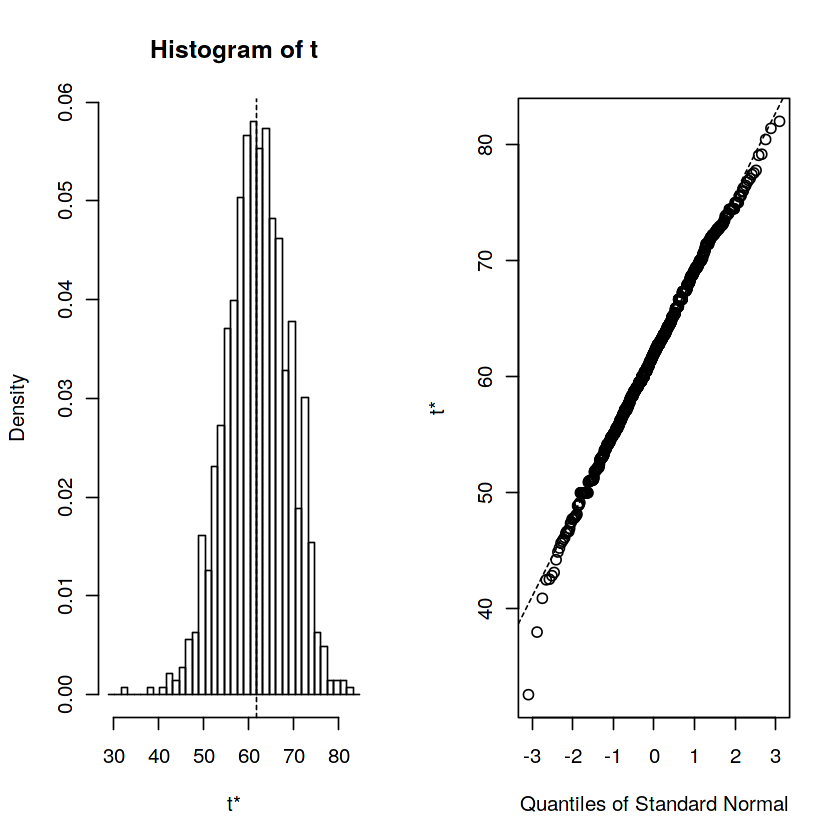

In [397]:
set.seed(12345)
graduatedBootstrap <- boot(combined, graduatedPercentage, R=1000)
plot(graduatedBootstrap, index=1)

### Getting 95% Confidence interval

In [398]:
boot.ci(graduatedBootstrap, index=1, type='norm')

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = graduatedBootstrap, type = "norm", index = 1)

Intervals : 
Level      Normal        
95%   (47.86, 75.11 )  
Calculations and Intervals on Original Scale

### Therefore we can be 95% confident that 47.86% to 75.11% of Graduated people will be voting for Gotabaya Rajapaska!